In [3]:
# URL: https://www.kinopoisk.ru/top/lists/1/filtr/all/sort/order/perpage/200/page=2/

In [1]:
from bs4 import BeautifulSoup
import re

In [7]:
# используем библиотеку requests для вывода html в отдельный файл
import requests
response=requests.get('https://www.kinopoisk.ru/top/lists/1/filtr/all/sort/order/perpage/200/page=3/')
with open('kinopoisk.html', 'wb') as output_file:
  output_file.write(response.text.encode('cp1251'))

In [8]:
# используем библиотеку BeautifulSoup для парсинга

soup=BeautifulSoup(open('kinopoisk.html'),'html.parser')
tags=soup.find('table',{'id':'itemList'})
items=tags.find_all('td',{'class':'news'})
results=[]


In [9]:
for item in items:
    
    # получаем название фильма на русском
    rname=item.find('button').get('data-title')
    rus_name=rname.split()
    name_str=' '.join(rus_name)
    
    
    # необходимо получить хронометраж и год фильма
    data=item.find('div',{'style':'margin-bottom: 9px'})
    film_data=data.find('span').text
            
    # получаем хронометраж фильма
    time=item.find('nobr').text
    time_list=time.split()
    time_str=' '.join(time_list)
    time_num=re.findall('([0-9]*)', time_str)[0]
    time_int=int(time_num)
        
    # получаем год фильма
    year=re.findall('\(\S*[^\d]+', film_data)[0]
    year_clean=year.split()
    year_str=''.join(year_clean)
    year_num=re.findall('([0-9]*)', year_str)[1]
    year_int=int(year_num)
    
    # оставшиеся данные
    missing_data=item.find('span',{'class':'gray_text'}).text.split()
    
    # получаем страну, выпустившую фильм
    country=missing_data[0] 
    country_clean=re.findall('(^[А-Я]+[а-я]*)', country) # данные очищены - имеем только название страны
    country_str=''.join(country_clean)
    
    # получаем жанр фильма
    genre_data=missing_data[1:] 
    genre_str=''.join(genre_data)
    
    # найдем данные, содержащиеся в скобках
    clean_genre=re.split('((^[^()]+))', genre_str)[3:]
    genre_string=''.join(clean_genre)
   
    #оставляем один жанр (первый по счету)
    genre_clean=re.findall('([а-я]*)',genre_string)[1:2]
    genre_str=''.join(genre_clean)

   
    df=(name_str, time_int, year_int, country_str, genre_str)
    results.append(df)

In [12]:
import pandas as pd
df = pd.DataFrame(results)
df.columns=['Name','Time','Year','Country','Genre']

In [13]:
df

,Name,Time,Year,Country,Genre
0,Мост Ватерлоо,108,1940,США,драма
1,Интервью с вампиром,123,1994,США,ужасы
2,Беглец,130,1993,США,боевик
3,Игра по чужим правилам,118,2006,США,драма
4,Рокко и его братья,177,1960,Италия,драма
5,"Дом, в котором я живу",100,1957,СССР,драма
6,На игле,94,1995,Великобритания,драма
7,Остров,112,2006,Россия,драма
8,Смертельное оружие,110,1987,США,боевик
9,Цветок пустыни,120,2009,Великобритания,драма


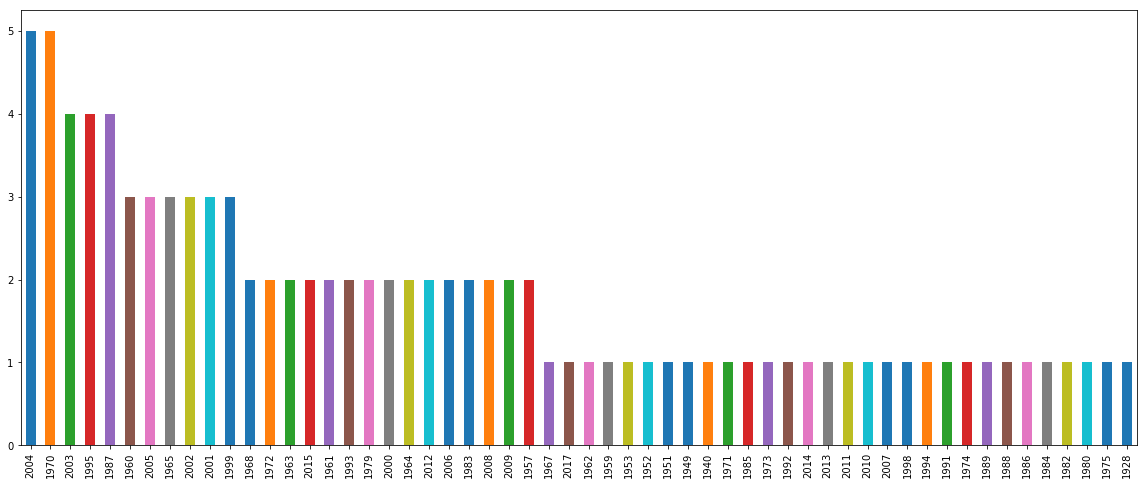

In [17]:
import matplotlib.pyplot as plt
df['Year'].value_counts().plot.bar(figsize = (20,8))

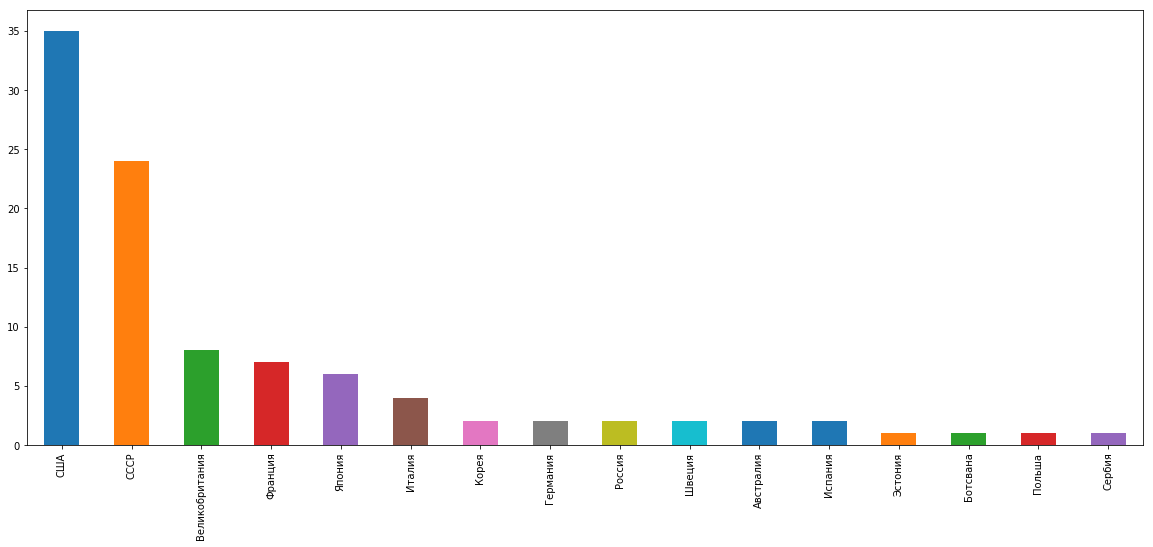

In [22]:
df['Country'].value_counts().plot.bar(figsize = (20,8))